In [107]:
import sqlite3
import datetime as dt   
import time
import csv
import requests
import pandas as pd, numpy as np
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [108]:
# helper functions

def sqlite_test():
	try:
		conn = sqlite3.connect('/Users/GGV/Desktop/trafffic.db')
		c = conn.cursor()
		query = "select * from trafi limit 10 ;"
		df = pd.read_sql_query(query, conn)
		print (df)
		print ("Sqlite connect OK")
	except:
		print ("Sqlite connect failed")




def sqlite_query_df(query):
	try:
		conn = sqlite3.connect('/Users/GGV/Desktop/trafffic.db')
		c = conn.cursor()
		df = pd.read_sql_query(query, conn)
		print ("Sqlite connect OK")
		return df 
	except:
		print ("Sqlite connect failed")

In [109]:
query= '''
select 

julianday(last_session_date) -  julianday(install_date ) as using_period, 
* 
from trafi 

'''
df = sqlite_query_df(query)

Sqlite connect OK


In [110]:
df.head()

,using_period,row ID,device_uuid,uid,ad_id,platform,install_date,last_session_date,uninstalled,uninstall_date,...,install_week,install_month,acquisition,active_user,stuck_onboard_flag,stuck_Gplay_flag,stuck_config_flag,stuck_location_flag,users,included_in_sample
0,2.0,1,056C91D3-279C-4169-87D5-A860B8DEF3CE,056C91D3-279C-4169-87D5-A860B8DEF3CE,056C91D3-279C-4169-87D5-A860B8DEF3CE,iOS,2016-08-10,2016-08-12,0,,...,2016-08-08,2016-08-01,organic,1,0,0,0,0,1,True
1,105.0,2,07D94915-13E6-4F18-951A-F360864A6581,07D94915-13E6-4F18-951A-F360864A6581,07D94915-13E6-4F18-951A-F360864A6581,iOS,2015-10-19,2016-02-01,0,,...,2015-10-19,2015-10-01,organic,1,0,0,0,0,1,True
2,9.0,3,10b09e7ff9f41602,10b09e7ff9f41602,b629558a-1437-4f3a-9468-798876d523e5,Android,2016-06-04,2016-06-13,0,,...,2016-05-30,2016-06-01,organic,1,1,0,0,0,1,True
3,0.0,4,12f4c6dd45eb8f9d,12f4c6dd45eb8f9d,be3b5866-8d74-45c7-9410-7085e9dca0f7,Android,2016-01-11,2016-01-11,1,2016-01-12,...,2016-01-11,2016-01-01,,0,1,0,0,0,1,True
4,0.0,5,15A96D2A-03E7-4F1F-B614-789B6E3CB5F9,15A96D2A-03E7-4F1F-B614-789B6E3CB5F9,15A96D2A-03E7-4F1F-B614-789B6E3CB5F9,iOS,2016-05-20,2016-05-20,0,,...,2016-05-16,2016-05-01,organic,1,0,0,0,0,1,True


In [111]:
df.columns

Index(['using_period', 'row ID', 'device_uuid', 'uid', 'ad_id', 'platform',
       'install_date', 'last_session_date', 'uninstalled', 'uninstall_date',
       'days_active', 'first_day_activity', 'activated', 'stuck_onboarding',
       'did_play_error', 'did_onboarding_config', 'did_onboarding_geo',
       'country', 'UserLocation', 'UserLocation_LAST', 'app_version',
       'acquisition_source', 'campaign', 'carrier', 'data_conn', 'HasMoovit',
       'HasMoovit_LAST', 'HasCitymapper', 'HasCitymapper_LAST',
       'AB_RadarOnboarding', 'AB_DisableOnboardingQuestions',
       'AB_EnableAndroidTabs', 'OnboardingQuestionAnswer',
       'AB_OnboardingQuestion', 'AB_AskAddFavoriteStop', 'AB_PushNextWeek',
       'AB_PushNextDay', 'AB_DisableBadge', 'AB_EnableSimplify',
       'AB_DisableRealtime', 'total_onboarding', 'day1_onboarding',
       'week1_onboarding', 'total_days_count', 'day2_days_count',
       'week1_days_count', 'week2_days_count', 'month1_days_count',
       'month2_days_co

In [112]:
df.groupby('country').count()['uid']

country
-other      5006
BR         42540
EE          4124
ID          3629
IN          9443
LT         26858
LV          5291
RU         32160
TR        115905
TW         15905
US           643
Name: uid, dtype: int64

In [113]:
df_india= df[df['country'] =='IN']

In [114]:
len(df_india)

9443

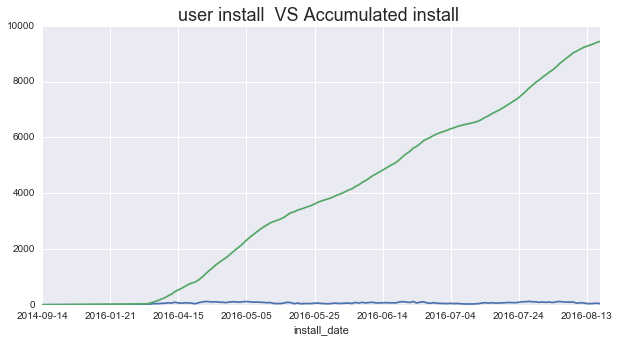

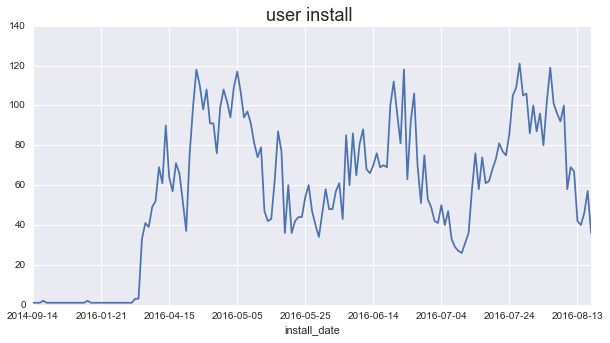

In [115]:
df_india.groupby('install_date').count()['uid'].plot(figsize=(10, 5))
df_india.groupby('install_date').count().cumsum()['device_uuid'].plot(figsize=(10, 5))
plt.title('user install  VS Accumulated install ',fontsize=18)

plt.show()


df_india.groupby('install_date').count()['uid'].plot(figsize=(10, 5))
plt.title('user install ',fontsize=18)

In [116]:
df_india.groupby('uninstalled').count()['device_uuid']

uninstalled
0    6998
1    2445
Name: device_uuid, dtype: int64

In [117]:
df_india.groupby('activated').count()['device_uuid']

activated
0    5575
1    3868
Name: device_uuid, dtype: int64

In [118]:
df_india[['using_period', 'install_date', 'last_session_date']]

,using_period,install_date,last_session_date
6,0.0,2016-05-01,2016-05-01
17,58.0,2016-05-13,2016-07-10
37,0.0,2016-08-17,2016-08-17
42,22.0,2016-06-09,2016-07-01
64,40.0,2016-06-03,2016-07-13
65,3.0,2016-08-07,2016-08-10
122,55.0,2016-06-23,2016-08-17
143,11.0,2016-07-28,2016-08-08
166,0.0,2016-05-02,2016-05-02
178,0.0,2016-06-29,2016-06-29


/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


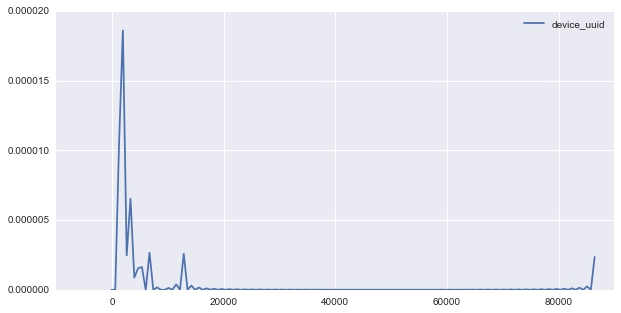

In [128]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df.groupby('using_period').count()['device_uuid'])